# Week 4 : Classification Model


---

Today lab exercise will be using Penguin Dataset
- Download the **Penguin Dataset** from Elearn
- Upload the dataset to your own Github
- Import the dataset using URL from your Github

**METADATA** <br>
species: penguin species (Chinstrap, Adélie, or Gentoo) <br>
culmen_length_mm: culmen length (mm) <br>
culmen_depth_mm: culmen depth (mm) <br>
flipper_length_mm: flipper length (mm) <br>
body_mass_g: body mass (g) <br>
island: island name (Dream, Torgersen, or Biscoe) in the Palmer Archipelago (Antarctica) <br>
sex: penguin sex <br>

What are culmen length & depth? <br>
The culmen is "the upper ridge of a bird's beak" (definition from Oxford Languages).

## Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree


## Load Dataset

1. Import dataset <br>
zDisplay 10 sample rows from the dataset

In [70]:
# Load the dataset from the provided URL
url = "https://raw.githubusercontent.com/Sandalgoreng/DATAMINING/refs/heads/main/penguins_size.csv"
penguins_data = pd.read_csv(url)

# Show the first few rows of the dataset to verify loading
penguins_data.head()


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Exploratory Data Analysis

2. Display the info column and conclude what the insight is from that column

In [71]:
# Display the information about the dataset using the `.info()` method
penguins_data_info = penguins_data.info()

penguins_data_info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


3. Show describe column and conclude what the insight is from that column

In [72]:
# Show statistical summary for numerical columns
penguins_data.describe()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


4. display the number of each unique value in species, island, and sex columns (including NaN)

In [73]:
# Display the number of each unique value in 'species', 'island', and 'sex' columns including NaN
species_counts = penguins_data['species'].value_counts(dropna=False)
island_counts = penguins_data['island'].value_counts(dropna=False)
sex_counts = penguins_data['sex'].value_counts(dropna=False)

species_counts, island_counts, sex_counts


(species
 Adelie       152
 Gentoo       124
 Chinstrap     68
 Name: count, dtype: int64,
 island
 Biscoe       168
 Dream        124
 Torgersen     52
 Name: count, dtype: int64,
 sex
 MALE      168
 FEMALE    165
 NaN        10
 .           1
 Name: count, dtype: int64)

5. Drop the null column(s)

In [75]:
# Drop columns with any null values
penguins_data_clean = penguins_data.dropna(inplace=True)

# Display the first few rows to verify the result
penguins_data.isnull().sum()


,0
species,0
island,0
culmen_length_mm,0
culmen_depth_mm,0
flipper_length_mm,0
body_mass_g,0
sex,0


6. Change the value "." in sex column, try to predict it based on other features (try to groupby 'sex' with Gentoo species in describe)

In [65]:
# Replace "." in the 'sex' column with NaN
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)



In [66]:
# Group by 'sex' for the Gentoo species and describe the features
gentoo_group = penguins_data[penguins_data['species'] == 'Gentoo'].groupby('sex').describe()

# Display the description to analyze differences between male and female
gentoo_group

culmen_length_mm                                                        \
                  count       mean       std   min    25%   50%     75%   max   
sex                                                                             
FEMALE             58.0  45.563793  2.051247  40.9  43.85  45.5  46.875  50.5   
MALE               61.0  49.473770  2.720594  44.4  48.10  49.5  50.500  59.6   

       culmen_depth_mm             ... flipper_length_mm        body_mass_g  \
                 count       mean  ...               75%    max       count   
sex                                ...                                        
FEMALE            58.0  14.237931  ...             215.0  222.0        58.0   
MALE              61.0  15.718033  ...             225.0  231.0        61.0   

                                                                         
               mean         std     min     25%     50%     75%     max  
sex                                                                      
FEMALE  4679.741379  281.578294  3950.0  4462.5  4700.0  4875.0  5200.0  
MALE    5484.836066  313.158596  4750.0  5300.0  5500.0  5700.0  6300.0  

[2 rows x 32 columns]

In [67]:
# Create a DataFrame to mimic the described structure
predicted_data = {
    'species': ['Gentoo'],
    'island': ['Biscoe'],
    'culmen_length_mm': [44.5],
    'culmen_depth_mm': [15.7],
    'flipper_length_mm': [217.0],
    'body_mass_g': [4875.0],
    'sex': ['FEMALE']
}

predicted_df = pd.DataFrame(predicted_data)

predicted_df


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,FEMALE


7. Create your own insightful visualization and explain it in at least 2 sentences

<ipython-input-17-978b6dc0abd4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=penguins_data, x='species', y='body_mass_g', palette='Set3')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to g

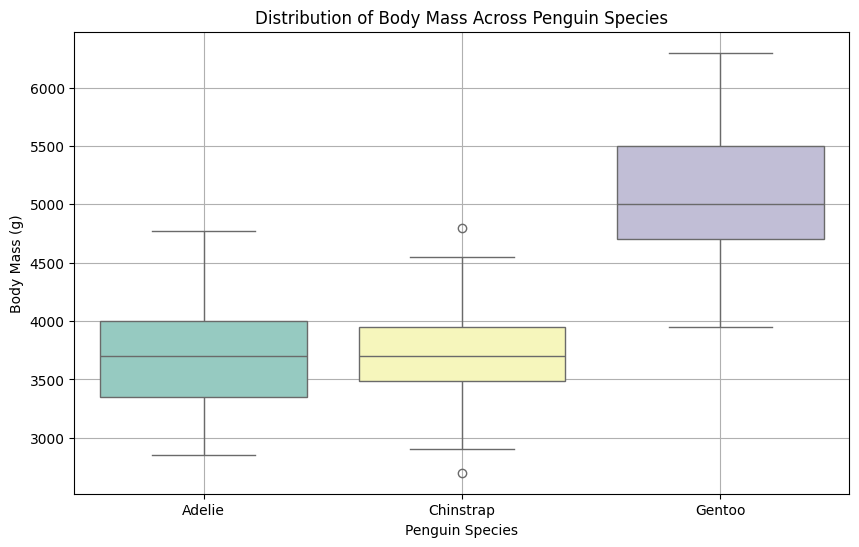

In [17]:
# Assuming penguins_data is already loaded
plt.figure(figsize=(10, 6))
sns.boxplot(data=penguins_data, x='species', y='body_mass_g', palette='Set3')

plt.title('Distribution of Body Mass Across Penguin Species')
plt.xlabel('Penguin Species')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

8. Check unique value of our target variable

In [18]:
# Check unique values in the target variable, e.g., 'sex' column
unique_sex_values = penguins_data['sex'].unique()
unique_species_values = penguins_data['species'].unique()

unique_sex_values, unique_species_values


(array(['MALE', 'FEMALE', nan], dtype=object),
 array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object))

9. encode categorical columns and display the results

In [22]:
# Replace "." in the 'sex' column with NaN
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)

# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Label Encoding for 'sex' (male: 0, female: 1)
penguins_encoded['sex'] = penguins_encoded['sex'].map({'male': 0, 'female': 1})

# Display the encoded DataFrame
penguins_encoded.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen
0,39.1,18.7,181.0,3750.0,NaN,False,False,False,True
1,39.5,17.4,186.0,3800.0,NaN,False,False,False,True
2,40.3,18.0,195.0,3250.0,NaN,False,False,False,True
3,NaN,NaN,NaN,NaN,NaN,False,False,False,True
4,36.7,19.3,193.0,3450.0,NaN,False,False,False,True


10. encode the target column and display the results

In [21]:
# Replace "." in the 'sex' column with NaN
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)

# Encode the target column 'sex' (male: 0, female: 1)
penguins_data['sex'] = penguins_data['sex'].map({'male': 0, 'female': 1})

# Display the results
encoded_results = penguins_data[['sex']]
encoded_results.head()

,sex
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


11. create a heatmap to see the correlation and explain the conclusion

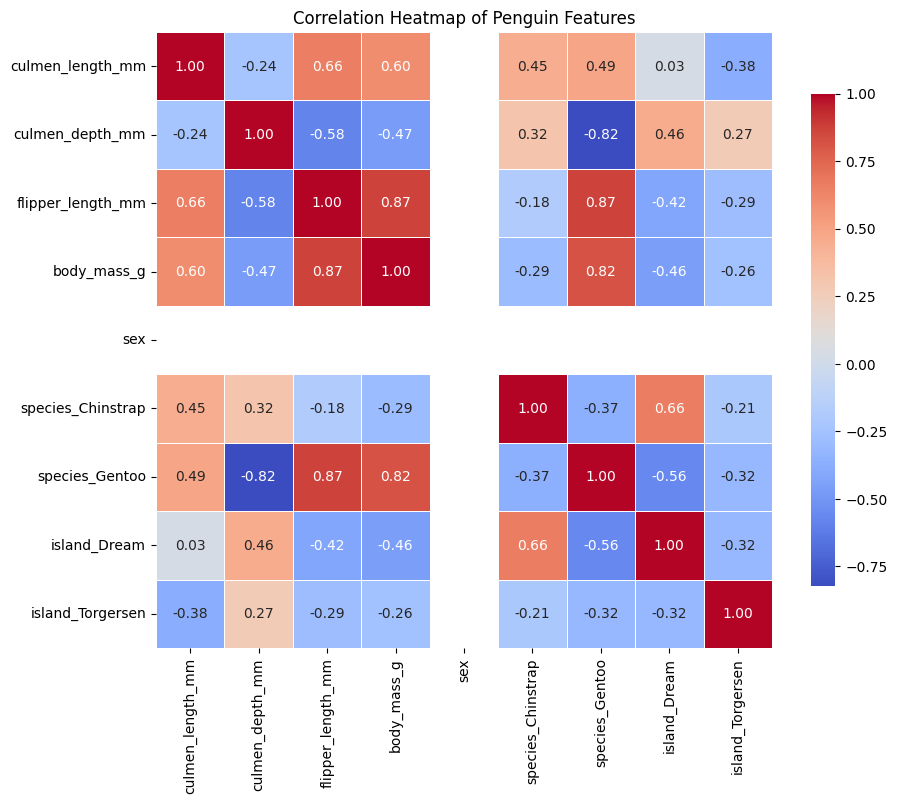

In [25]:
# Replace "." in the 'sex' column with NaN and encode it
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)
penguins_data['sex'] = penguins_data['sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Calculate the correlation matrix for relevant numerical features
correlation_matrix = penguins_encoded.corr()

# Create a single heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title('Correlation Heatmap of Penguin Features')
plt.show()

## Machine Learning

1. Splitting X and y

In [26]:
# Replace "." in the 'sex' column with NaN and encode it
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)
penguins_data['sex'] = penguins_data['sex'].map({'male': 0, 'female': 1})

# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = penguins_encoded.drop('sex', axis=1)  # Features
y = penguins_encoded['sex']  # Target variable

# Display the shapes of X and y
X.shape, y.shape


((344, 8), (344,))

2. Split data into training and test set (test size 20% and random state 42) and check the shape of X_train and X_test

In [28]:
# Splitting the dataset into features (X) and target (y)
X = penguins_encoded.drop('sex', axis=1)  # Features
y = penguins_encoded['sex']  # Target variable

In [29]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of X_train and X_test
X_train.shape, X_test.shape

((275, 8), (69, 8))

## Desicion Tree


---

a. Defining the model using criterion Entropy and Gini Index <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Check for overfitting and underfitting <br>
e. Visualize decision trees <br>
f. Confusion matrix <br>
g. Classification report <br>
h. Results and conclusion <br>

1. Criterion Entropy

In [35]:
# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = penguins_encoded.drop('sex', axis=1)  # Features
y = penguins_encoded['sex']  # Target variable

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Display the initial shape of the dataset
"Initial shape of dataset:", penguins_data.shape

# Check for missing values in the dataset
missing_values = penguins_data.isnull().sum()
"\nMissing values in each column:\n", missing_values

# Replace "." in the 'sex' column with NaN
penguins_data['sex'] = penguins_data['sex'].replace('.', np.nan)

# Encode the 'sex' column
penguins_data['sex'] = penguins_data['sex'].map({'male': 0, 'female': 1})

# Drop rows where the 'sex' column is NaN
penguins_data.dropna(subset=['sex'], inplace=True)

# Check the shape after dropping NaNs in 'sex'
print("Shape after dropping NaNs in 'sex':", penguins_data.shape)

# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Display the shape of the encoded DataFrame
print("Shape of encoded DataFrame:", penguins_encoded.shape)

# Splitting the dataset into features (X) and target (y)
X = penguins_encoded.drop('sex', axis=1)  # Features
y = penguins_encoded['sex']  # Target variable

# Print the shape of X and y for debugging
"Shape of X:", X.shape
"Shape of y:", y.shape


Shape after dropping NaNs in 'sex': (0, 7)
Shape of encoded DataFrame: (0, 5)


('Shape of y:', (0,))

In [51]:
# One-Hot Encoding for 'species' and 'island'
penguins_encoded = pd.get_dummies(penguins_data, columns=['species', 'island'], drop_first=True)

# Splitting the dataset into features (X) and target (y)
X = penguins_encoded.drop('sex', axis=1)  # Features
y = penguins_encoded['sex']  # Target variable

# Print the shape of X and y for debugging
"Shape of X:", X.shape
"Shape of y:", y.shape

# Splitting the data into training and test sets
X_train,

(     culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
 66               35.5             16.2              195.0       3350.0   
 229              46.8             15.4              215.0       5150.0   
 7                39.2             19.6              195.0       4675.0   
 140              40.2             17.1              193.0       3400.0   
 323              49.1             15.0              228.0       5500.0   
 ..                ...              ...                ...          ...   
 188              47.6             18.3              195.0       3850.0   
 71               39.7             18.4              190.0       3900.0   
 106              38.6             17.2              199.0       3750.0   
 270              46.6             14.2              210.0       4850.0   
 102              37.7             16.0              183.0       3075.0   
 
      species_Chinstrap  species_Gentoo  island_Dream  island_Torgersen  
 66               False 

In [55]:
# Check if either X or y is empty before proceeding
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("X or y is empty. Check data preprocessing steps.")

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model using criterion Entropy
entropy_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
entropy_model.fit(X_train, y_train)  # Fit the model to the training data

# Define the model using Gini Index
gini_model = DecisionTreeClassifier(criterion='gini', random_state=42)
gini_model.fit(X_train, y_train)  # Fit the model to the training data

# Predict the test set results
entropy_test_predictions = entropy_model.predict(X_test)
gini_test_predictions = gini_model.predict(X_test)

# Calculate accuracy scores for both models
entropy_test_accuracy = accuracy_score(y_test, entropy_test_predictions)
gini_test_accuracy = accuracy_score(y_test, gini_test_predictions)

# Print accuracy scores
print(f"Entropy Model - Test Accuracy: {entropy_test_accuracy:.2f}")
print(f"Gini Model - Test Accuracy: {gini_test_accuracy:.2f}")

# Checking for overfitting and underfitting
if entropy_model.score(X_train, y_train) > entropy_test_accuracy:
    print("Entropy model may be overfitting.")
elif entropy_model.score(X_train, y_train) < entropy_test_accuracy:
    print("Entropy model may be underfitting.")

if gini_model.score(X_train, y_train) > gini_test_accuracy:
    print("Gini model may be overfitting.")
elif gini_model.score(X_train, y_train) < gini_test_accuracy:
    print("Gini model may be underfitting.")


Entropy Model - Test Accuracy: 0.85
Gini Model - Test Accuracy: 0.87
Entropy model may be overfitting.
Gini model may be overfitting.


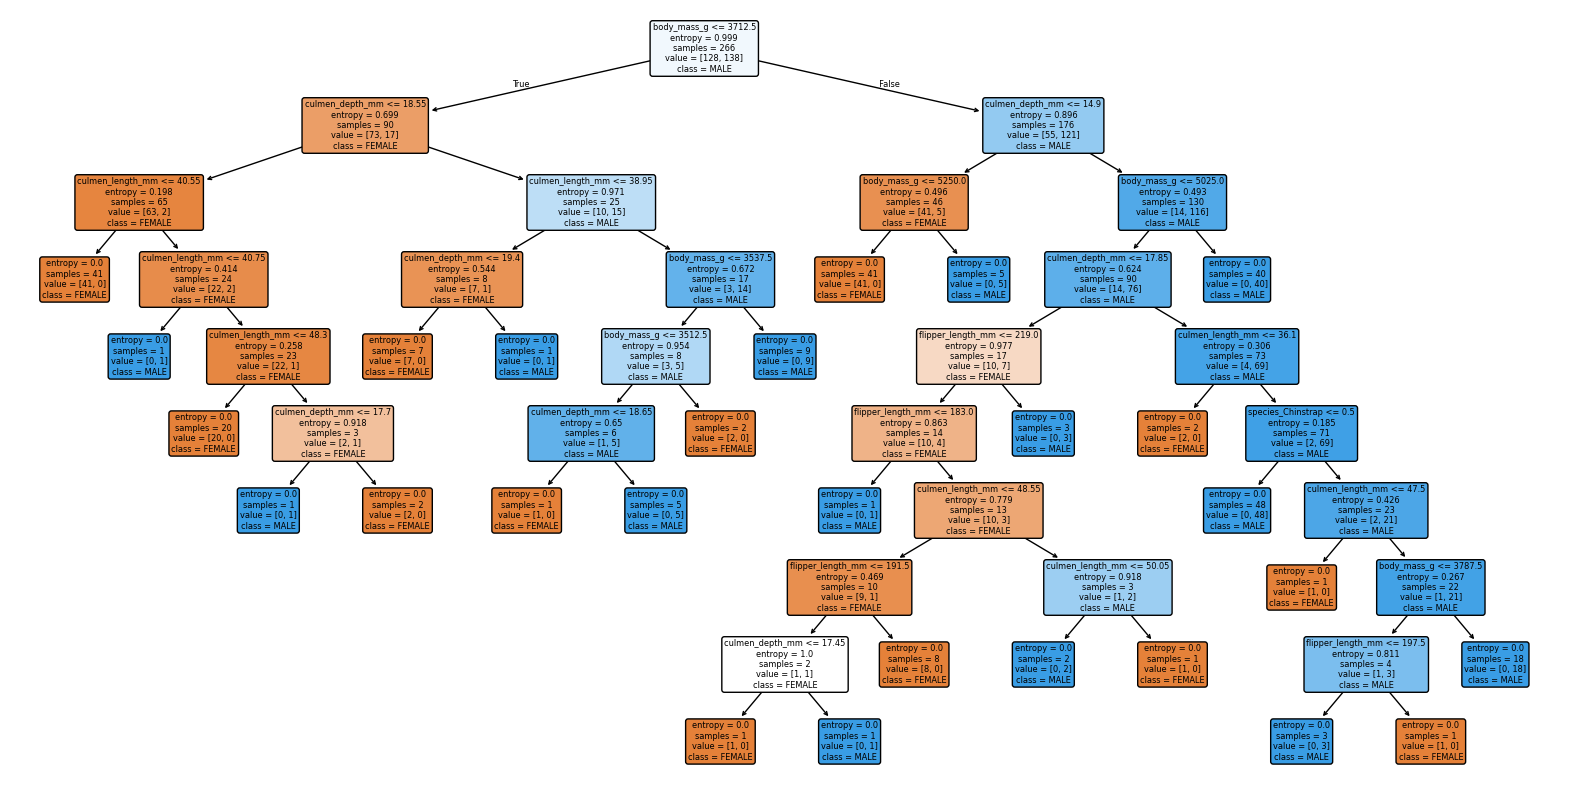

In [88]:
# Plotting the Decision Tree for the Entropy model
plt.figure(figsize=(20, 10))
plt.title("Decision Tree using Criterion: Entropy")
plot_tree(entropy_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.show()


2. Criterion Gini index

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier with Gini index and max_depth
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Display the initialized model
gini_model


DecisionTreeClassifier(max_depth=3, random_state=0)

In [84]:
# Initialize the Decision Tree Classifier with Gini index and max_depth
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# Fit the model to the training data
gini_model.fit(X_train, y_train)

# Predict the test set results
gini_predictions = gini_model.predict(X_test)

# Calculate accuracy score
gini_accuracy = accuracy_score(y_test, gini_predictions)

# Output the accuracy score in the desired format
f"Model accuracy score with criterion gini index: {gini_accuracy:.4f}"


'Model accuracy score with criterion gini index: 0.8406'

In [87]:
# Calculate training and test set scores
train_score = gini_model.score(X_train, y_train)
test_score = gini_model.score(X_test, y_test)

# Output the training and test set scores in the desired format
print(f"Training set score: {train_score:.4f}")
print(f"Test set score: {test_score:.4f}")


Training set score: 0.8982
Test set score: 0.8406


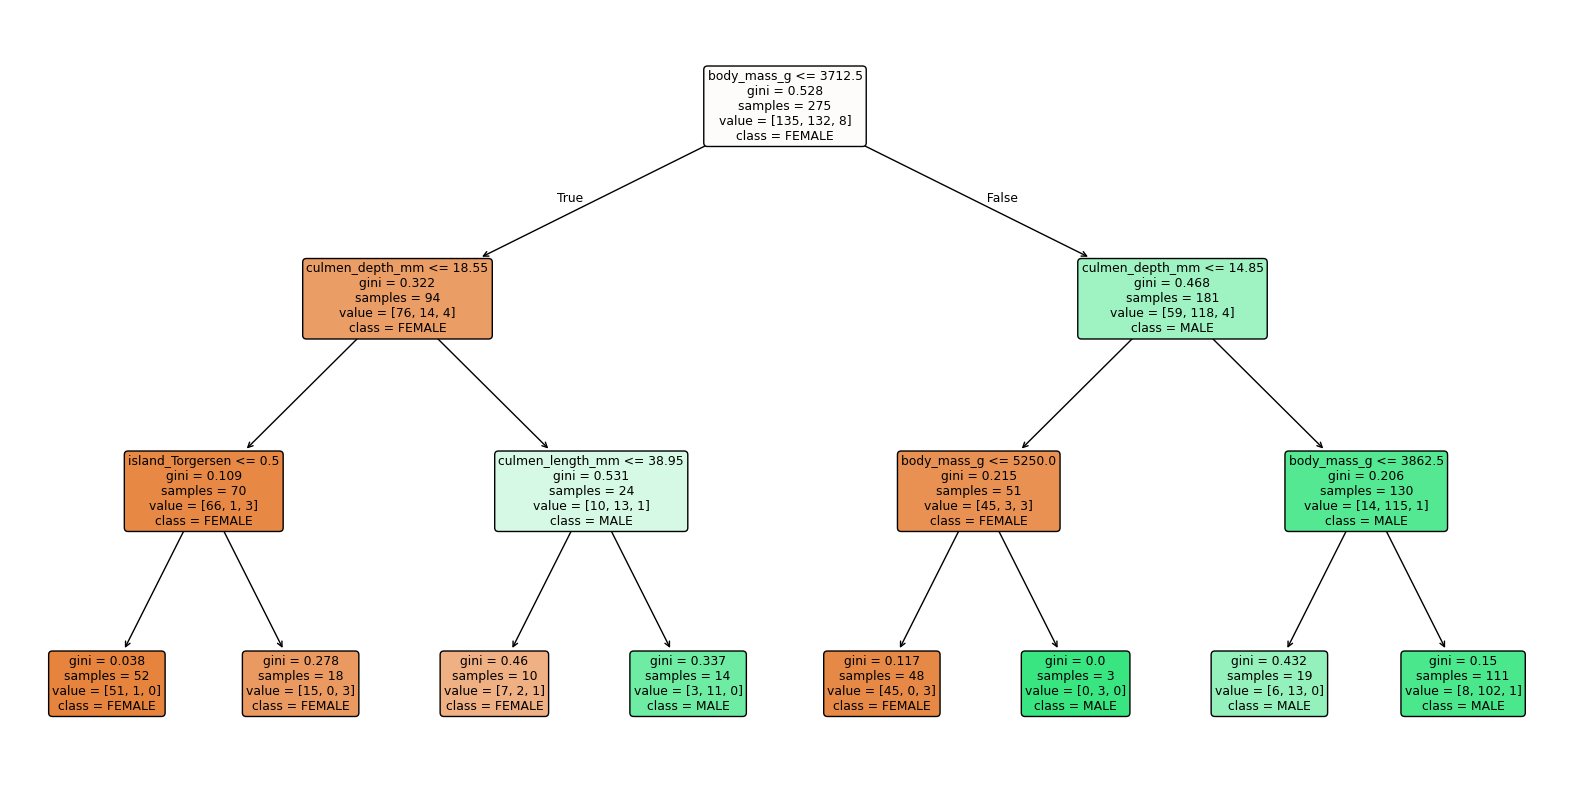

In [89]:
# Plotting the Decision Tree for the Gini model
plt.figure(figsize=(20, 10))
plt.title("Decision Tree using Criterion: Gini")
plot_tree(gini_model, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str), rounded=True)
plt.show()

3. Confusion matrix and classification report of criterion Entropy and Gini index

In [92]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have fitted both models and made predictions
# Predictions for the Entropy model
entropy_predictions = entropy_model.predict(X_test)

# Predictions for the Gini Index model
gini_predictions = gini_model.predict(X_test)

# Compute confusion matrices
confusion_entropy = confusion_matrix(y_test, entropy_predictions)
confusion_gini = confusion_matrix(y_test, gini_predictions)

# Output Confusion Matrices
print("Confusion Matrix Entropy")
print(confusion_entropy)
print("\nConfusion Matrix Gini Index")
print(confusion_gini)


Confusion Matrix Entropy
[[28  2  0]
 [ 1 35  0]
 [ 2  1  0]]

Confusion Matrix Gini Index
[[23  7  0]
 [ 1 35  0]
 [ 0  3  0]]


In [126]:
entropy_report = classification_report(y_test, entropy_predictions, target_names=['Unknown', 'Male', 'Female'], output_dict=False)
print("Classification Report Entropy")
print(entropy_report)
# Classification report for Gini Index model
gini_report = classification_report(y_test, gini_predictions, target_names=['Unknown', 'Male', 'Female'], output_dict=False)
print("Classification Report Gini Index")
print(gini_report)


Classification Report Entropy
              precision    recall  f1-score   support

     Unknown       0.90      0.93      0.92        30
        Male       0.92      0.97      0.95        36
      Female       0.00      0.00      0.00         3

    accuracy                           0.91        69
   macro avg       0.61      0.64      0.62        69
weighted avg       0.87      0.91      0.89        69

Classification Report Gini Index
              precision    recall  f1-score   support

     Unknown       0.96      0.77      0.85        30
        Male       0.78      0.97      0.86        36
      Female       0.00      0.00      0.00         3

    accuracy                           0.84        69
   macro avg       0.58      0.58      0.57        69
weighted avg       0.82      0.84      0.82        69



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

## Naive Bayes


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

library : from sklearn.naive_bayes import GaussianNB

In [117]:
from sklearn.naive_bayes import GaussianNB
naive_bayes_model = GaussianNB()
naive_bayes_model

GaussianNB()

In [121]:
# Confusion Matrix
gnb_confusion_matrix = confusion_matrix(y_test, gnb_predictions)
print("Confusion Matrix Gaussian Naive Bayes")
print(gnb_confusion_matrix)

Confusion Matrix Gaussian Naive Bayes
[[13  6 11]
 [ 5 25  6]
 [ 0  1  2]]


In [122]:
# Classification Report
gnb_classification_report = classification_report(y_test, gnb_predictions, target_names=['Unknown', 'Male', 'Female'])
print("Classification Report Gaussian Naive Bayes")
print(gnb_classification_report)

Classification Report Gaussian Naive Bayes
              precision    recall  f1-score   support

     Unknown       0.72      0.43      0.54        30
        Male       0.78      0.69      0.74        36
      Female       0.11      0.67      0.18         3

    accuracy                           0.58        69
   macro avg       0.54      0.60      0.49        69
weighted avg       0.73      0.58      0.63        69



In [128]:
"Good Luck"

'Good Luck'

Good Luck :)